<a href="https://colab.research.google.com/github/rlaxodns/google-/blob/main/keras19_EarlyStopping_califonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping

In [ ]:
# 데이터 구성
data = fetch_california_housing()
x = data.data
y = data.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,
                                                    random_state = 114)

In [ ]:
# 모델 구성
model = Sequential()
model.add(Dense(200, input_dim = 8, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

In [ ]:
# 컴파일 및 훈련
es = EarlyStopping(
    monitor = 'val_loss',
    mode = 'min',
    patience = 50,
    restore_best_weights = True)
model.compile(loss = 'mse', optimizer = 'adam')
hist = model.fit(x_train, y_train, epochs = 1000, batch_size = 2,
                 validation_split = 0.2, callbacks = [es])

Epoch 1/1000
5779/5779 [==============================] - 25s 4ms/step - loss: 89.1142 - val_loss: 5.9526
Epoch 2/1000
5779/5779 [==============================] - 23s 4ms/step - loss: 1.3802 - val_loss: 1.1544
Epoch 3/1000
5779/5779 [==============================] - 25s 4ms/step - loss: 1.3595 - val_loss: 1.3332
Epoch 4/1000
5779/5779 [==============================] - 28s 5ms/step - loss: 1.3722 - val_loss: 1.3028
Epoch 5/1000
5779/5779 [==============================] - 29s 5ms/step - loss: 1.3815 - val_loss: 1.3137
Epoch 6/1000
5779/5779 [==============================] - 37s 6ms/step - loss: 1.3494 - val_loss: 1.3145
Epoch 7/1000
5779/5779 [==============================] - 30s 5ms/step - loss: 1.3521 - val_loss: 1.3192
Epoch 8/1000
5779/5779 [==============================] - 34s 6ms/step - loss: 1.3513 - val_loss: 1.3025
Epoch 9/1000
5779/5779 [==============================] - 21s 4ms/step - loss: 1.3513 - val_loss: 1.3025
Epoch 10/1000
5779/5779 [=============================

In [ ]:
# 평가 및 예측
loss = model.evaluate(x_test, y_test)
result = model.predict([x])

# 결정계수
y_pre = model.predict(x_test)
r2 = r2_score(y_test, y_pre)

print('loss : ', loss)
print('결정계수 : ', r2)
print(result)

194/194 [==============================] - 1s 3ms/step
loss :  1.1645628213882446
결정계수 :  0.12054802927873343
[[4.4019732]
 [1.9894004]
 [3.49881  ]
 ...
 [1.9894004]
 [1.9894004]
 [1.9894004]]


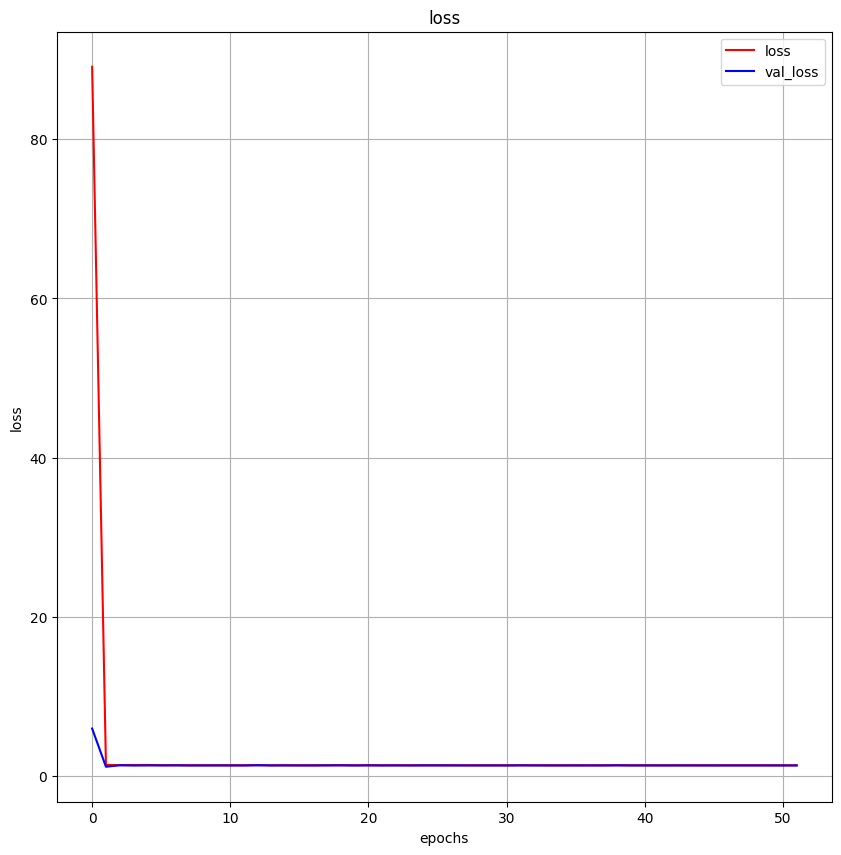

In [ ]:
# 시각화
plt.figure(figsize = (10,10))
plt.plot(hist.history['loss'], c = 'red', label = 'loss')
plt.plot(hist.history['val_loss'], c = 'blue', label = 'val_loss')
plt.legend(loc = 'upper right')
plt.grid()
plt.title('loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()